In [1]:
 # set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
import matplotlib.pyplot as plt
import torch
import matplotlib as mpl
import numpy as np

In [3]:
from IAF_VAE_mnist.VAE import VAE
from Utils.load_4_point import x_train_4_points

In [4]:
#experiment_dict = {"latent_dim": 2, "n_IAF_steps": 4, "IAF_node_width" : 320}
experiment_dict = {"latent_dim": 2, "n_IAF_steps": 6, "IAF_node_width" : 320}

In [5]:
vae = VAE(**experiment_dict)

running using cpu


In [6]:
vae.device

device(type='cpu')

In [12]:
epoch_model = 63
model_path = f"IAF_VAE_mnist/saved_models/latent_dim_2__n_IAF_steps_6__h_dim_200_IAF_node_width_320/2021_03_16-07_56_36_AM/epochs_{epoch_model}__model"
#f"IAF_VAE_mnist/saved_models/latent_dim_2__n_IAF_steps_4__h_dim_200_IAF_node_width_320/2021_03_15-05_35_11_PM/epochs_{epoch_model}__model"
vae.load_NN_model(model_path)

In [9]:
vae.optimizer.param_groups[0]["lr"]

0.002

In [10]:
data_chunk = torch.tensor(x_train_4_points)

Text(0, 0.5, '$z_2$')

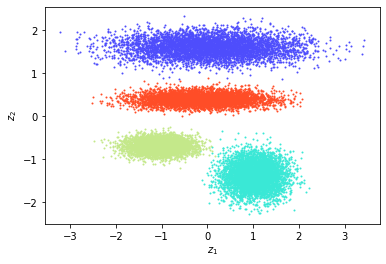

In [11]:
n_points_latent_vis = 4
cols = mpl.cm.rainbow(np.linspace(0.1, 0.9, n_points_latent_vis))
plt.figure()
for point_n in range(n_points_latent_vis):
    point_repeat = np.zeros((5000, 1, 28, 28))
    point_repeat[:, :, :, :] = data_chunk[point_n, :, :, :]
    encoding_2D = vae.get_latent_encoding(torch.tensor(point_repeat, dtype=torch.float32).to(vae.device))
    plt.scatter(encoding_2D[:, 0], encoding_2D[:, 1], color=cols[point_n], s=1, )
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")

Text(0, 0.5, '$z_2$')

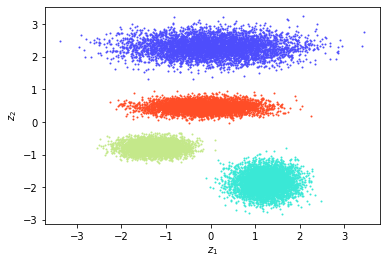

In [11]:
n_points_latent_vis = 4
cols = mpl.cm.rainbow(np.linspace(0.1, 0.9, n_points_latent_vis))
plt.figure()
for point_n in range(n_points_latent_vis):
    point_repeat = np.zeros((5000, 1, 28, 28))
    point_repeat[:, :, :, :] = data_chunk[point_n, :, :, :]
    encoding_2D = vae.get_latent_encoding(torch.tensor(point_repeat, dtype=torch.float32).to(vae.device))
    plt.scatter(encoding_2D[:, 0], encoding_2D[:, 1], color=cols[point_n], s=1, )
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")